In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("TaxiFare.csv")

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.size

400000

In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [10]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [11]:
df=df.drop(["unique_id"],axis=1)

In [12]:
df["date_time_of_pickup"]=pd.to_datetime(df["date_time_of_pickup"],infer_datetime_format=True)

In [13]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


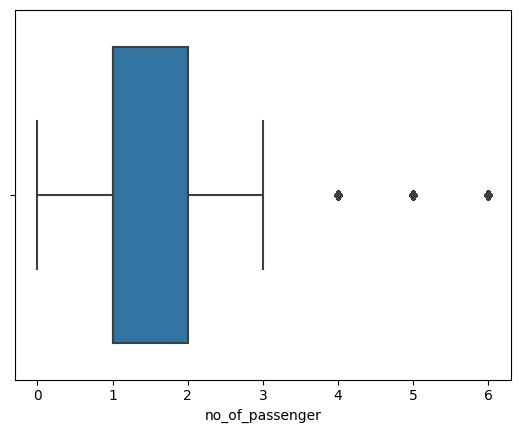

In [14]:
sns.boxplot(x="no_of_passenger",data=df)
plt.show()

In [15]:
median1=df["no_of_passenger"].median()
df["no_of_passenger"]=df["no_of_passenger"].replace(0,median1)

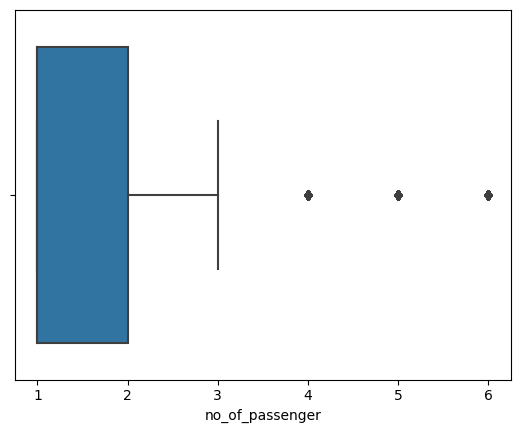

In [16]:
sns.boxplot(x="no_of_passenger",data=df)
plt.show()

In [17]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [18]:
low,upp=remove_outlier(df["no_of_passenger"])
df["no_of_passenger"]=np.where(df["no_of_passenger"]>upp,upp,df["no_of_passenger"])
df["no_of_passenger"]=np.where(df["no_of_passenger"]<low,low,df["no_of_passenger"])

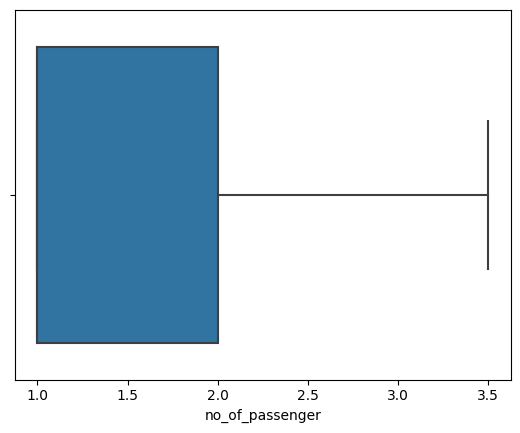

In [19]:
sns.boxplot(x="no_of_passenger",data=df)
plt.show()

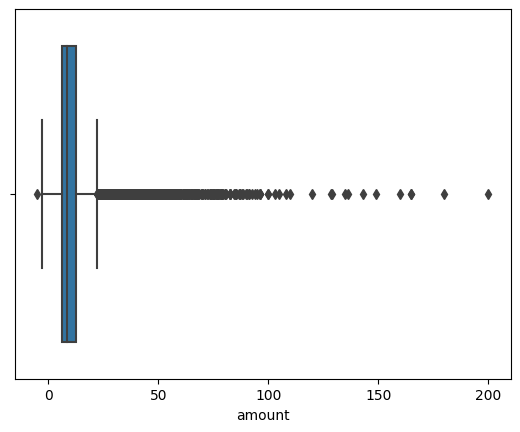

In [20]:
sns.boxplot(x='amount',data=df)
plt.show()

In [21]:
median2=df['amount'].median() 
neg_fare = df.loc[df.amount==0,:].index
neg_fare
# df.drop(neg_fare, axis = 0, inplace = True)

Index([10002, 27891, 47302], dtype='int64')

In [22]:
df['amount']=df['amount'].replace(np.nan,median2)

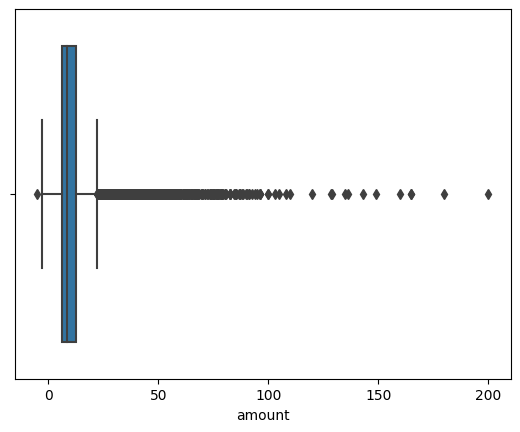

In [23]:
sns.boxplot(x='amount',data=df)
plt.show()

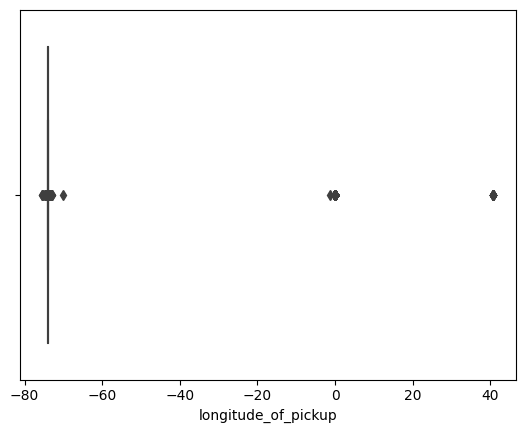

In [24]:
sns.boxplot(x='longitude_of_pickup',data=df)
plt.show()

In [25]:
low_LongPick,upp_LongPick=remove_outlier(df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']>upp_LongPick,upp_LongPick,df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']<low_LongPick,low_LongPick,df['longitude_of_pickup'])

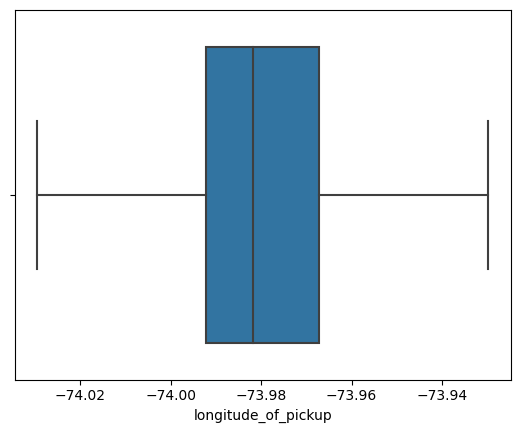

In [26]:
sns.boxplot(x='longitude_of_pickup',data=df)
plt.show()

In [27]:
low_LatPick,upp_LatPick=remove_outlier(df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']>upp_LatPick,upp_LatPick,df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']<low_LatPick,low_LatPick,df['latitude_of_pickup'])

In [28]:
low_LongDrop,upp_LongDrop=remove_outlier(df['longitude_of_dropoff'])
df['longitude_of_dropoff']=np.where(df['longitude_of_dropoff']>upp_LongDrop,upp_LongDrop,df['longitude_of_dropoff'])
df['longitude_of_dropoff']=np.where(df['longitude_of_dropoff']<low_LongDrop,low_LongDrop,df['longitude_of_dropoff'])

In [29]:
low_LatDrop,upp_LatDrop=remove_outlier(df['latitude_of_dropoff'])
df['latitude_of_dropoff']=np.where(df['latitude_of_dropoff']>upp_LatDrop,upp_LatDrop,df['latitude_of_dropoff'])
df['latitude_of_dropoff']=np.where(df['latitude_of_dropoff']<low_LatDrop,low_LatDrop,df['latitude_of_dropoff'])

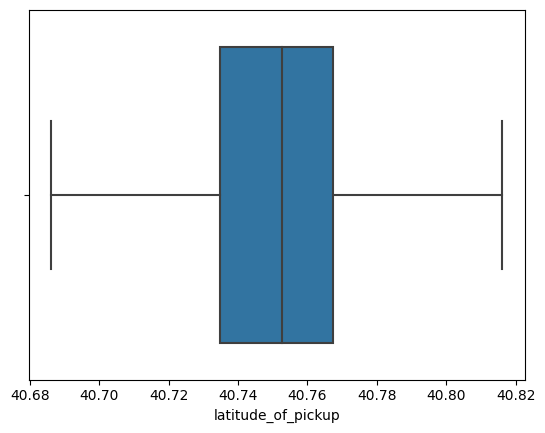

In [30]:
sns.boxplot(x='latitude_of_pickup',data=df)
plt.show()

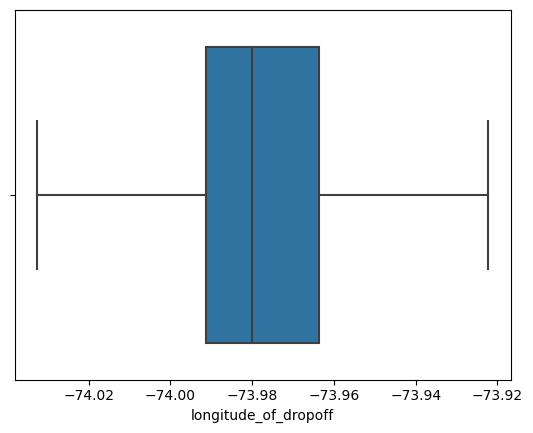

In [31]:
sns.boxplot(x='longitude_of_dropoff',data=df)
plt.show()

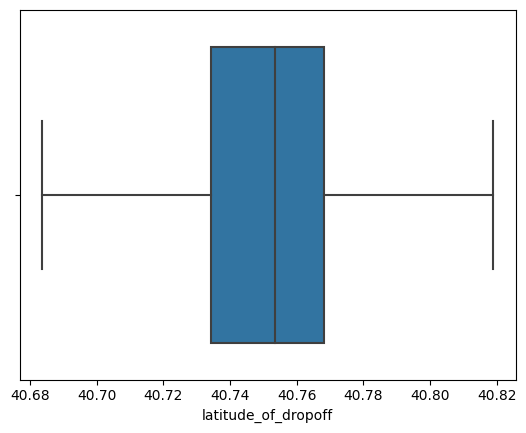

In [32]:
sns.boxplot(x='latitude_of_dropoff',data=df)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 2.7 MB


In [34]:
df['pickup_hour'] = df.date_time_of_pickup.dt.hour

In [35]:
df['pickup_date'] =  df.date_time_of_pickup.dt.day

In [36]:
df['pickup_day_of_week'] =  df.date_time_of_pickup.dt.dayofweek

In [37]:
df['pickup_month'] =  df.date_time_of_pickup.dt.month

In [38]:
df['pickup_year'] =  df.date_time_of_pickup.dt.year

In [39]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                     float64
pickup_hour                           int32
pickup_date                           int32
pickup_day_of_week                    int32
pickup_month                          int32
pickup_year                           int32
dtype: object

In [40]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_hour,pickup_date,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.929777,40.721319,-73.922231,40.712278,1.0,17,15,0,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16,5,1,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0,18,3,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,4,21,5,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,7,9,1,3,2010


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  float64            
 7   pickup_hour           50000 non-null  int32              
 8   pickup_date           50000 non-null  int32              
 9   pickup_day_of_week    50000 non-null  int32              
 10  pickup_month          50000 non-null  int32              
 11  pickup_year           50000 non-null  int32              
dtypes: d

In [42]:
df=df.drop(['date_time_of_pickup'],axis=1)

In [43]:
X=df.drop("amount",axis=1)
Y=df['amount']

In [44]:
X_train,X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.30,random_state=1)

In [45]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [46]:
model.score(X_train,Y_train)

0.12636438735127475

In [47]:
model.score(X_test,Y_test)

0.12207751759238217

In [48]:
### Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [49]:
model2=DecisionTreeRegressor(max_depth=8)
model2.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=8)

In [50]:
model2.score(X_train,Y_train)

0.7106992957750241

In [51]:
model2.score(X_test,Y_test)

0.4884116980596753

In [52]:
###Bagging Regression
from sklearn.ensemble import BaggingRegressor

In [53]:
model3=BaggingRegressor(n_estimators=90,base_estimator=model2)
model3.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                 n_estimators=90)

In [54]:
model3.score(X_train,Y_train)

0.7224652805018199

In [55]:
model3.score(X_test,Y_test)

0.6012223772335985

In [56]:
### Ada Boosting
from sklearn.ensemble import AdaBoostRegressor

In [57]:
model4=AdaBoostRegressor(n_estimators=30)
model4.fit(X_train,Y_train)

AdaBoostRegressor(n_estimators=30)

In [58]:
model4.score(X_train,Y_train)

0.21435156732967708

In [59]:
model4.score(X_test,Y_test)

0.1736049735370092

In [60]:
###Random Forest
from sklearn.ensemble import RandomForestRegressor

In [61]:
model5=RandomForestRegressor(n_estimators=50,max_features=5)
model5.fit(X_train,Y_train)

RandomForestRegressor(max_features=5, n_estimators=50)

In [62]:
model5.score(X_train,Y_train)

0.9598518490740675

In [63]:
model5.score(X_test,Y_test)

0.6937699862316115

In [64]:
### Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
model6=GradientBoostingRegressor(n_estimators=90)
model6.fit(X_train,Y_train)

GradientBoostingRegressor(n_estimators=90)

In [66]:
model6.score(X_train,Y_train)

0.7034121724749463

In [67]:
model6.score(X_test,Y_test)

0.6548347562127721